## Análisis de la columna "location"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

Obtenemos el dataframe:

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
len(df)

7613

In [4]:
df.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [5]:
len(df.loc[df["location"].isna()]) # Cantidad de tweets sin ubicación

2533

In [6]:
f'{(len(df.loc[df["location"].isna()]) / len(df)) * 100:.2f}%' # Porcentaje de valores nulos

'33.27%'

Se observa que `location` es la columna con la mayor cantidad de valores nulos. Una pregunta que podríamos hacernos es, ¿influye que el tweet tenga o no ubicación en la veracidad del mismo?

In [7]:
location_not_null_target = df.loc[df["location"].notnull()]["target"].value_counts()
location_not_null_target

0    2884
1    2196
Name: target, dtype: int64

In [8]:
location_null_target = df.loc[df["location"].isna()]["target"].value_counts()
location_null_target

0    1458
1    1075
Name: target, dtype: int64

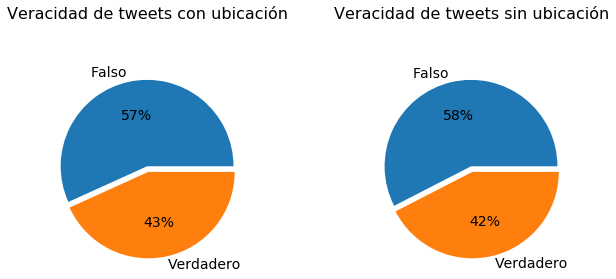

In [9]:
fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(
    location_not_null_target,
    autopct="%1.0f%%",
    explode=(0.05, 0.05),
    labels=("Falso", "Verdadero"),
    radius=1.5,
    textprops={"fontsize": 14}
)
plt.title("Veracidad de tweets con ubicación", y=1.5, fontsize=16)

ax2 = fig.add_axes([.75, 0, .5, .5], aspect=1)
ax2.pie(
    location_null_target,
    autopct="%1.0f%%",
    explode=(0.05, 0.05),
    labels=("Falso", "Verdadero"),
    radius=1.5,
    textprops={"fontsize": 14}
)
plt.title("Veracidad de tweets sin ubicación", y=1.5, fontsize=16)

plt.show()

A continuación podemos ver cuántos tweets tenemos de cada ubicación:

In [10]:
df["location"].value_counts()

USA                              104
New York                          71
United States                     50
London                            45
Canada                            29
                                ... 
Bishops Lydeard, England           1
Cardiff, Wales                     1
Slappin and Smackin                1
sitting on Eddie Vedders lap,      1
Ocean City, NJ                     1
Name: location, Length: 3341, dtype: int64

In [11]:
df["location"].value_counts().describe()

count    3341.000000
mean        1.520503
std         3.022364
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       104.000000
Name: location, dtype: float64

Por las estadísticas obtenidas, pareciera que la mayoría de las ubicaciones aparecen pocas veces.

Text(0, 0.5, 'Densidad')

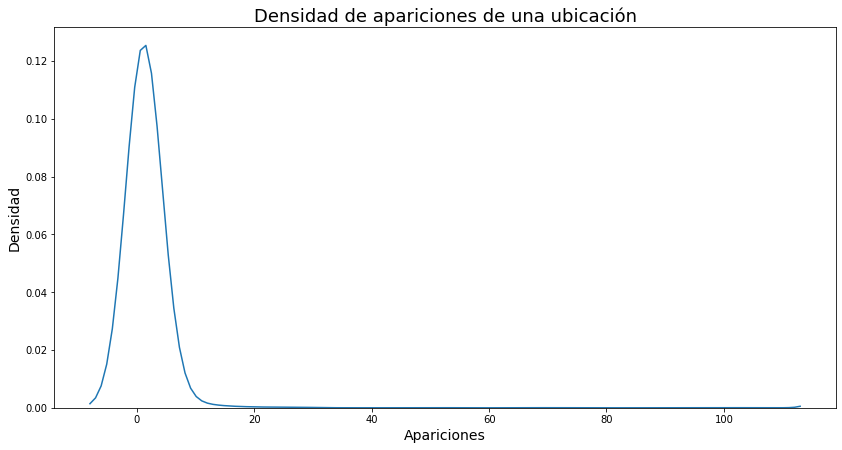

In [12]:
plt.figure(figsize=(14,7))
ax = sns.kdeplot(df["location"].value_counts(), bw=3)
ax.get_legend().remove()
plt.title("Densidad de apariciones de una ubicación", fontsize=18)
plt.xlabel("Apariciones", fontsize=14)
plt.ylabel("Densidad", fontsize=14)

Obtenemos las ubicaciones más y menos frecuentes:

In [13]:
df["location"].value_counts().head(10)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

In [14]:
df["location"].value_counts().tail(10)

AZ                               1
Galapa / AtlÌÁntico              1
IN                               1
Honolulu, Hawaii                 1
State of Dreaming                1
Bishops Lydeard, England         1
Cardiff, Wales                   1
Slappin and Smackin              1
sitting on Eddie Vedders lap,    1
Ocean City, NJ                   1
Name: location, dtype: int64

Podemos obtener, por ejemplo, los tweets de las 10 ubicaciones más frecuentes:

In [15]:
top_locations = df["location"].value_counts().nlargest(10).index.to_list()
tweets_from_top_locations = df[df["location"].isin(top_locations)]

Y con estos datos realizar un gráfico:

Text(0, 0.5, 'Ubicación')

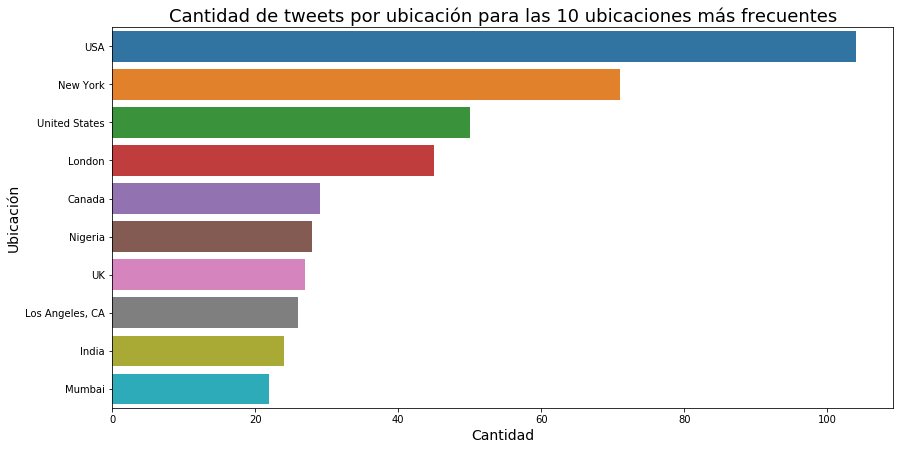

In [16]:
plt.figure(figsize=(14,7))

sns.countplot(
    y="location",
    data=tweets_from_top_locations,
    order=top_locations
)

plt.title("Cantidad de tweets por ubicación para las 10 ubicaciones más frecuentes", fontsize=18)
plt.xlabel("Cantidad", fontsize=14)
plt.ylabel("Ubicación", fontsize=14)

Analicemos ahora los tweets diferenciándolos por su `target`:

In [17]:
real_tweets = df.loc[df["target"] == 1]
false_tweets = df.loc[df["target"] == 0]

In [18]:
len(real_tweets)

3271

In [19]:
real_tweets["location"].value_counts().head(10)

USA               67
United States     27
Nigeria           22
India             20
Mumbai            19
New York          16
UK                16
London            16
Washington, DC    15
Canada            13
Name: location, dtype: int64

In [20]:
len(false_tweets)

4342

In [21]:
false_tweets["location"].value_counts().head(10)

New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Canada             16
Kenya              15
Everywhere         12
UK                 11
Florida            11
Name: location, dtype: int64

In [22]:
tweet_counts = (df.groupby(["location", "target"])
                .agg({"text": "count"})
                .reset_index()
                .rename(columns={"text": "count"}))

tweet_counts_from_top_locations = tweet_counts.loc[tweet_counts["location"].isin(top_locations)]

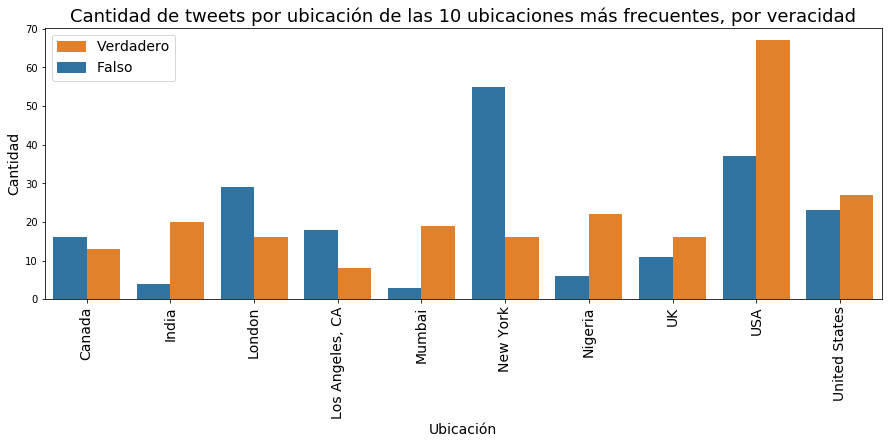

In [23]:
plt.figure(figsize=(15,5))
p = sns.barplot(x="location", y="count", hue="target", data=tweet_counts_from_top_locations)

plt.legend(handles=[
    mpatches.Patch(color='#E1812C', label='Verdadero'),
    mpatches.Patch(color='#3274A1', label='Falso')
], prop={'size': 14})

plt.title("Cantidad de tweets por ubicación de las 10 ubicaciones más frecuentes, por veracidad", fontsize=18)
plt.xlabel("Ubicación", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.setp(p.get_xticklabels(), rotation=90, fontsize=14)
plt.show()